## Third Lab

What we are going to do today:
- Introduce two optimizers for local search methods
- Use the optimizer with the methods defined before

This cell below is simply importing some useful stuff for later

In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from time import time as t

## Optimizers
### 2opt
As we saw last time, we have 12 problems and two have an optimal solution

In [2]:
import numpy as np

from src.utils import compute_length


def step2opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 1
    tsp_sequence = np.array(solution)
    uncrosses = 0
    # TODO
 
    # END TODO
    return tsp_sequence, distance, uncrosses


def swap2opt(tsp_sequence, i, j):
    # TODO
   
    # END TODO
    return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    # TODO
   
    # END TODO

#### Let's test it



#############################
name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


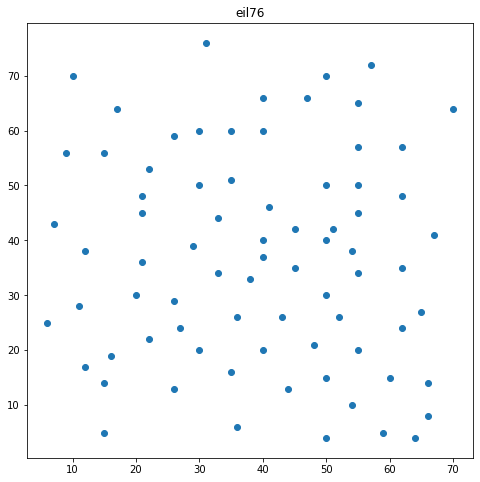

In [3]:
from src.io_tsp import ProblemInstance
example_problem = "../problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
p_inst.print_info()
p_inst.plot_data()

In [4]:
from src.TSP_solver import TSPSolver
from src.constructive_algorithms import (
    random_method,
    nearest_neighbor,
    best_nearest_neighbor,
    multi_fragment_mf
)

available_solvers = {
    "random": random_method,
    "nn":nearest_neighbor,
    "best_nn":best_nearest_neighbor,
    "multi_fragment": multi_fragment_mf
}

###  solving with ['nn'] ####
Error the solution of nn for problem eil76 is not valid


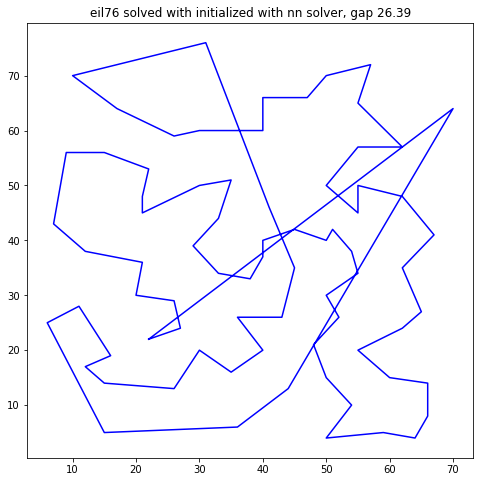

best solution with len 680.0 
with a total time of 0.00199 seconds
solution found has a 26.39 % gap
0.08876371383666992


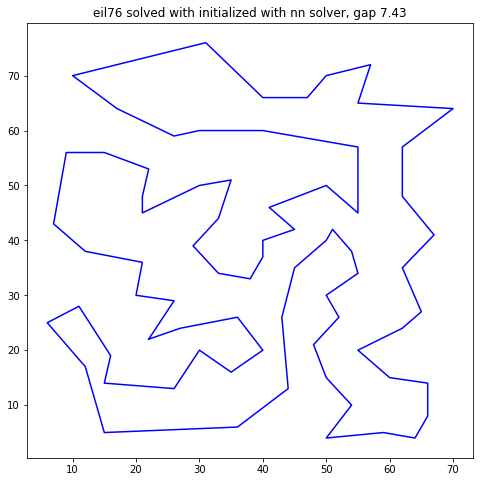

 7.43 % gap
with 23 number of uncrossed edges


In [5]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### 2.5opt

In [8]:
import numpy as np

from src.utils import compute_length

def step2dot5opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 2
    tsp_sequence = np.array(solution)
    uncrosses = 0
    for i in range(1, seq_length - 1):
        for j in range(i + 1, seq_length):
            #TODO
            # 2opt swap
           
            # node shift 1
           
            # node shift 2
           
            # END TODO
    return tsp_sequence, distance, uncrosses


def shift1(tsp_sequence, i, j):
    new_tsp_sequence = np.concatenate(
        [tsp_sequence[:i], tsp_sequence[i + 1: j + 1], [tsp_sequence[i]], tsp_sequence[j + 1:]])
    return new_tsp_sequence


def shift_gain1(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                    matrix_dist[tsp_sequence[i], tsp_sequence[i + 1]] +
                    matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[i - 1], tsp_sequence[i + 1]] +
                         matrix_dist[tsp_sequence[i], tsp_sequence[j]]
                         + matrix_dist[tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def shift2(tsp_sequence, i, j):
    new_tsp_sequence = np.concatenate(
        [tsp_sequence[:i], [tsp_sequence[j]], tsp_sequence[i: j], tsp_sequence[j + 1:]])
    return new_tsp_sequence


def shift_gain2(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j - 1]] + matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (
            matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[tsp_sequence[i], tsp_sequence[j]] +
            matrix_dist[tsp_sequence[j - 1], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def loop2dot5opt(solution, instance, max_num_of_changes=10000):
    matrix_dist = instance.dist_matrix
    actual_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    while uncross < max_num_of_changes:
        # TODO
       
        # END TODO
    return new_tsp_sequence.tolist(), new_len, uncross

###  solving with ['nn'] ####
Error the solution of nn for problem eil76 is not valid


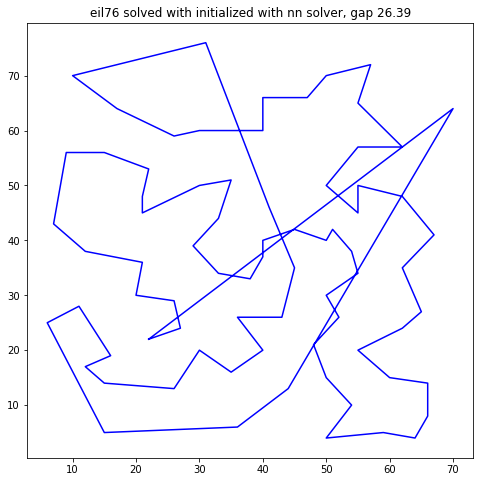

best solution with len 680.0 
with a total time of 0.00396 seconds
solution found has a 26.39 % gap
0.2393958568572998


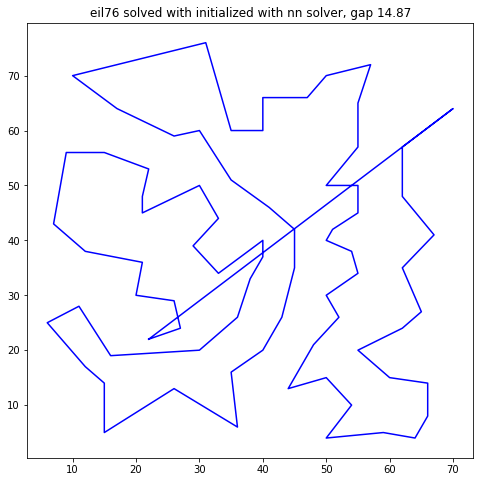

 14.87 % gap
with 22 number of uncrossed edges


In [12]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2dot5opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Let's analyse the performances of the optimizers and the algorithms discussed until now


###  solving with ['nn'] ####
Error the solution of nn for problem eil76 is not valid


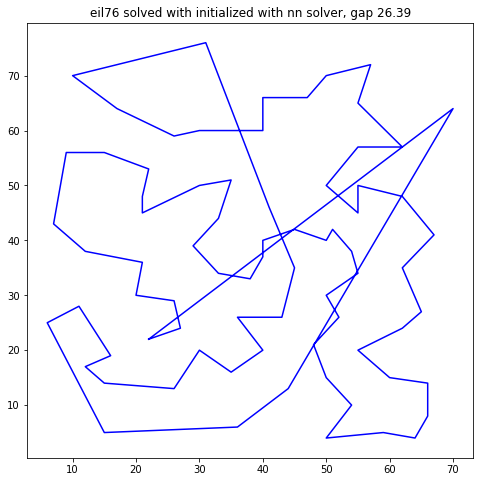

best solution with len 680.0 
with a total time of 0.00296 seconds
solution found has a 26.39 % gap
0.08779788017272949


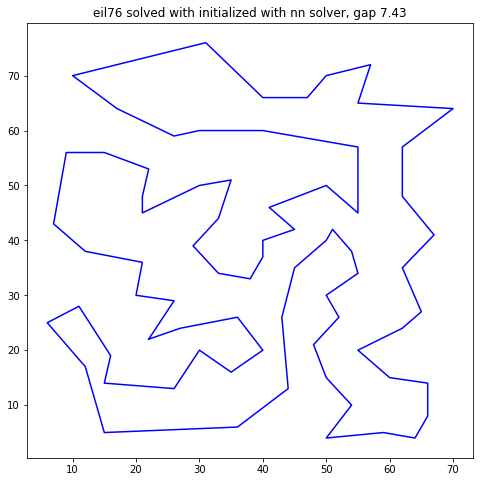

 7.43 % gap
with 23 number of uncrossed edges
0.23433327674865723


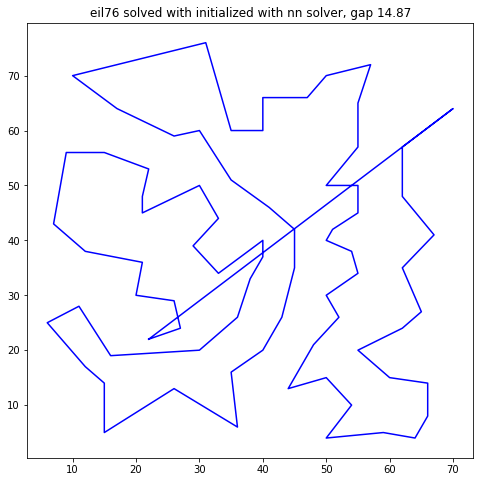

 14.87 % gap
with 22 number of uncrossed edges


In [13]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

old_solution=solver.solution


start = t()
solution, new_length, uncross = loop2opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

start = t()
solution, new_length, uncross = loop2dot5opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Simulated Annealing


In [16]:
import numpy as np

from src.utils import compute_length


def sa(solution, instance, constant_temperature=0.95, iterations_for_each_temp=100):
    # initial setup
    temperature = instance.best_sol / np.sqrt(instance.nPoints)
    current_sol = np.array(solution)
    current_len = compute_length(solution, instance.dist_matrix)
    best_sol = np.array(solution)
    best_len = current_len

    # main loop
    while temperature > 0.001:
        # TODO
        
    # END TODO
    return best_sol.tolist()


def random_sol_from_neigh(solution, instance):
    i, j = np.random.choice(np.arange(1, len(solution) - 1), 2, replace=False)
    i, j = np.sort([i, j])
    return sa_swap2opt(solution, i, j), gain(i, j, solution, instance.dist_matrix)


def sa_swap2opt(tsp_sequence, i, j):
    new_tsp_sequence = np.copy(tsp_sequence)
    new_tsp_sequence[i:j + 1] = np.flip(tsp_sequence[i:j + 1], axis=0)  # flip or swap ?
    return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


###  solving with ['nn'] ####
Error the solution of nn for problem eil76 is not valid


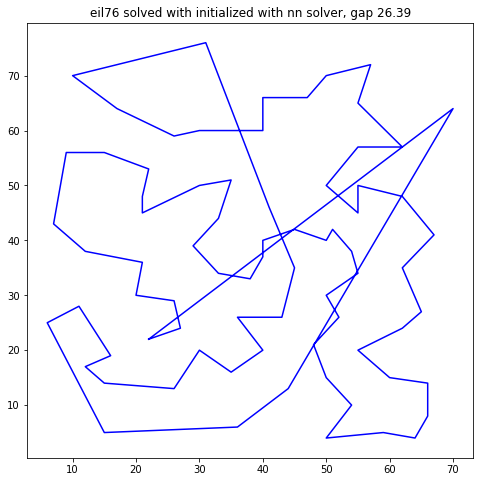

best solution with len 680.0 
with a total time of 0.00299 seconds
solution found has a 26.39 % gap
1.024263858795166


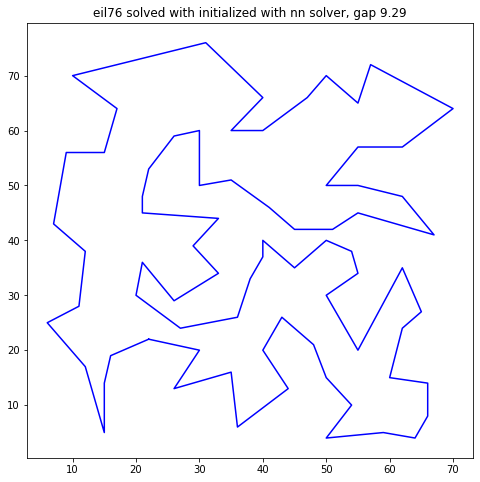

 9.29 % gap


In [17]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution = sa(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by SA"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")


# Homework

1. implement 3opt

2. check performances of combined methods creatind a table.